# Housing Prediction using Advance Regression

    Author: Vijender Singh 
    Email: vijendersingh412@gmail.com
    To: Upgrad and IIIT-B

## Import packages

In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold,GridSearchCV

## Read file

In [227]:
df = pd.read_csv('train.csv')

## Understanding data

In [228]:
print(f'Total rows are {df.shape[0]} and columns are {df.shape[1]}.')

Total rows are 1460 and columns are 81.


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [230]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [231]:
print(f'Total null values are {df.isnull().sum().sum()}')

Total null values are 6965


## Handling Missing Values

In [232]:
def check_null_values(the_data_frame):

  the_series = the_data_frame.isnull().sum() * 100 / len(df)
  the_series = the_series.sort_values(ascending=False)
  the_series = the_series[the_series>0]
  return the_series

check_null_values(df)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [233]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [234]:
df['PoolQC'] = df['PoolQC'].fillna("NA")

In [235]:
check_null_values(df)

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [236]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [237]:
df['MiscFeature'] = df['MiscFeature'].fillna("NA")

In [238]:
check_null_values(df)

Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access 

In [239]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [240]:
df['Alley'] = df['Alley'].fillna("NA")

In [241]:
check_null_values(df)

Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### Handling Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [242]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [243]:
df['Fence'] = df['Fence'].fillna("NA")

In [244]:
check_null_values(df)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [245]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [246]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")

In [247]:
check_null_values(df)

LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling LotFrontage: Linear feet of street connected to property

In [248]:
df.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

In [249]:
df['LotFrontage'].median()

69.0

In [250]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [251]:
df.groupby("Neighborhood")['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [252]:
df["LotFrontage"] = df.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [253]:
check_null_values(df)

GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

### Handling 

GarageType: Garage location

GarageFinish: Interior finish of the garage

GarageCond: Garage condition

GarageQual: Garage quality

As per documentation Na means no garage assigned.
		
    NA	No Garage



In [254]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('NA')

In [255]:
check_null_values(df)

GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### Handling GarageYrBlt: Year garage was built. We are assuming data as none if garage was built at start and replacing to minimum year

In [256]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].min())

In [257]:
check_null_values(df)

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### Handling Basement Variables

BsmtCond: Evaluates the general condition of the basement

BsmtQual: Evaluates the height of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinType2: Rating of basement finished area (if multiple types)

    NA	No Basement

In [258]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [259]:
for col in ['BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual']:
  df[col] = df[col].fillna("NA")

In [260]:
check_null_values(df)

MasVnrType    0.547945
MasVnrArea    0.547945
Electrical    0.068493
dtype: float64

### Handling MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [261]:
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [262]:
check_null_values(df)

Electrical    0.068493
dtype: float64

### Handling Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [263]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [264]:
df.groupby('Electrical')['Electrical'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: Electrical, dtype: int64

In [265]:
df['Electrical'].mode()[0]

'SBrkr'

Since most common is SBrkr. So replacing nan with SBrkr

In [266]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [267]:
check_null_values(df)

Series([], dtype: float64)

Data is cleaned!!!!

## Dervied Metrics


GarageYrBlt: Year garage was built

YrSold: Year Sold (YYYY)

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [268]:
df['Remodelling'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Uni Variate Analysis

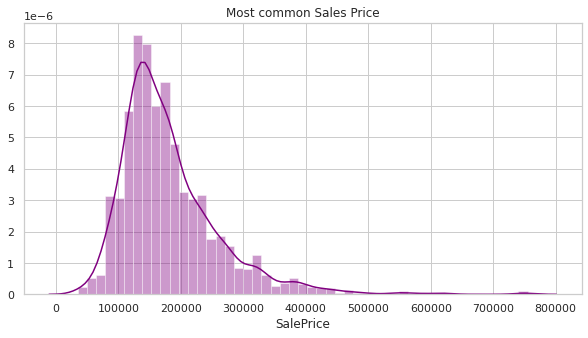

In [270]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(df["SalePrice"], color="purple")
plt.title('Most common Sales Price')
plt.show()

# sns.distplot(df['SalePrice'])

In [271]:
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


In [272]:
df['SalePrice'] = np.log(df['SalePrice'])

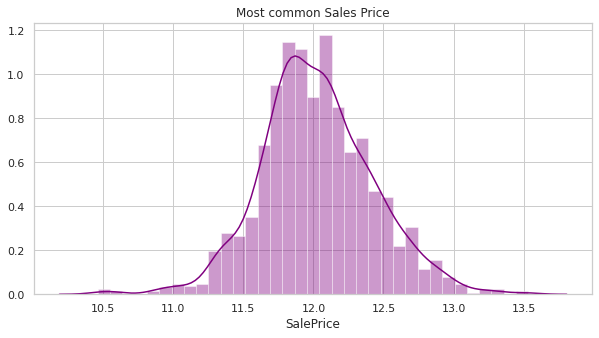

In [273]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(df["SalePrice"], color="purple")
plt.title('Most common Sales Price')
plt.show()

## BI variate Analysis

In [274]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
GarageYrBlt      0.594179
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
LotFrontage      0.353288
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Remodelling 

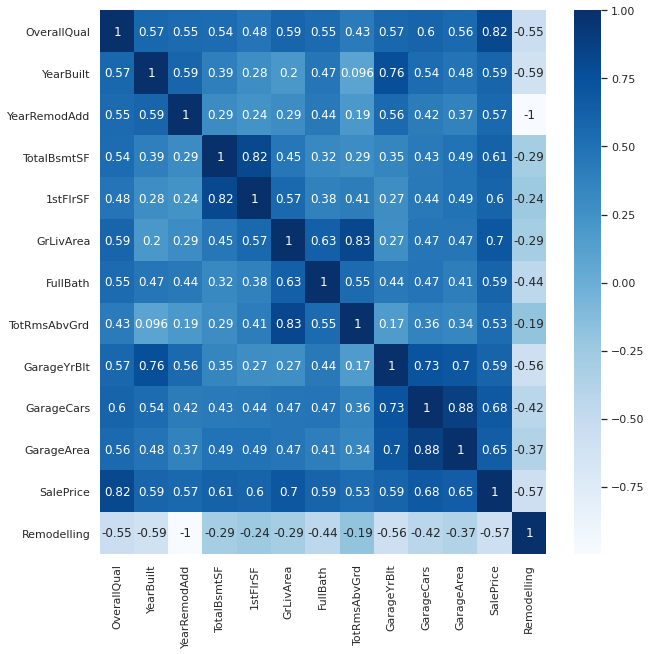

In [275]:
top_features = df.corr().index[abs(df.corr()["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(df[top_features].corr(),annot=True,cmap="Blues")

In [276]:
def bivariate_analysis(x, y):

  temp = df[x].unique()
  order = np.sort(temp)

  plt.figure(figsize=(10,5))
  ax = sns.barplot(x=x, y=y, data=df, order=order)
  my_str = y +" wrt "+x
  plt.title(my_str)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()

In [277]:
top_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice', 'Remodelling'],
      dtype='object')

In [278]:
my_list = df.select_dtypes(exclude=['int','float']).columns

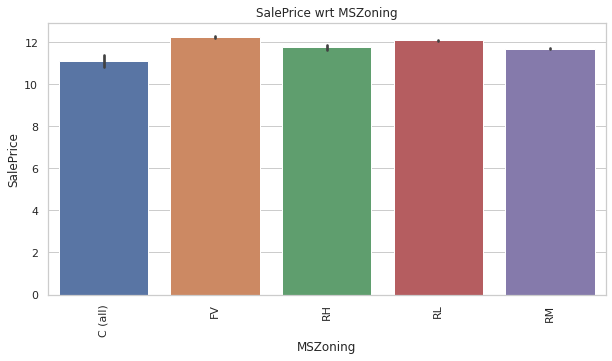

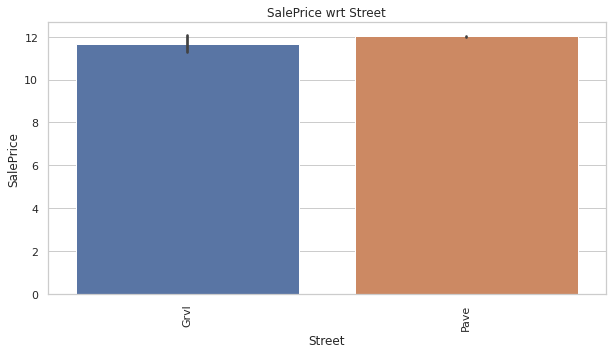

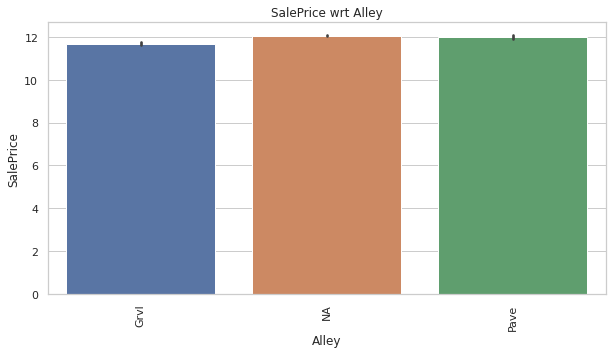

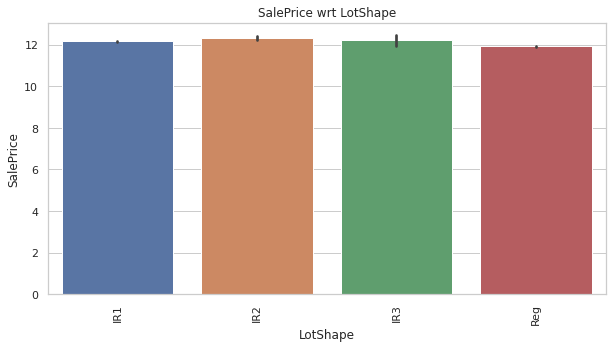

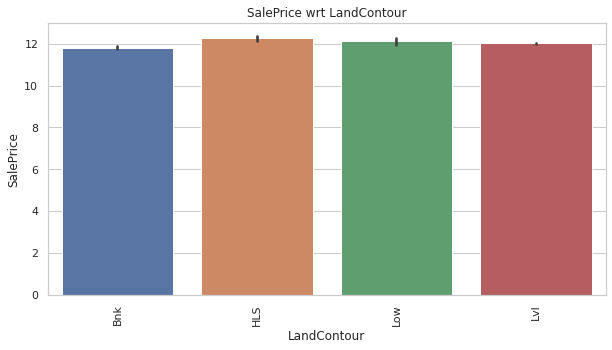

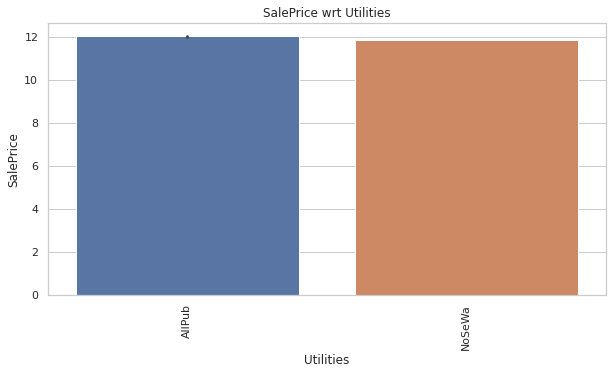

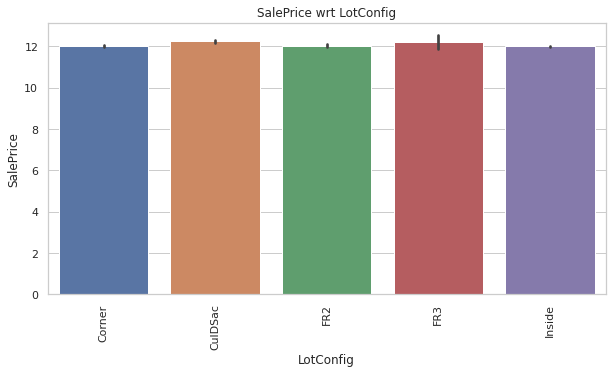

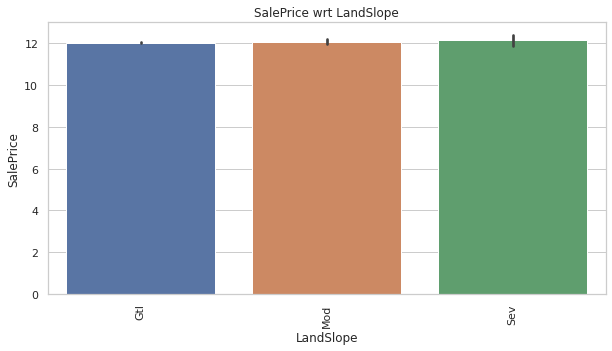

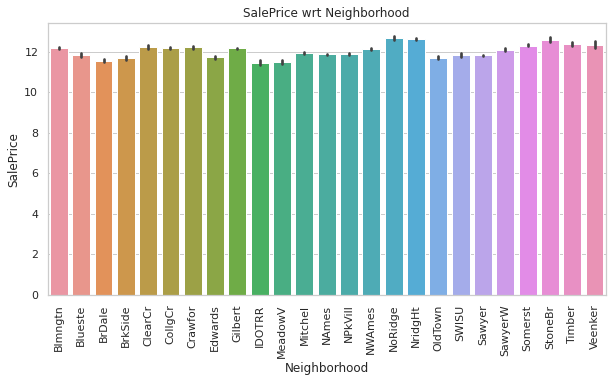

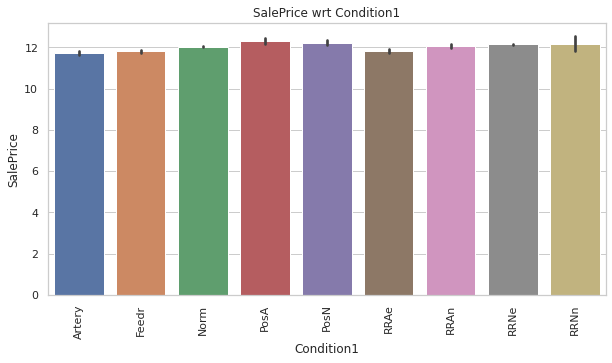

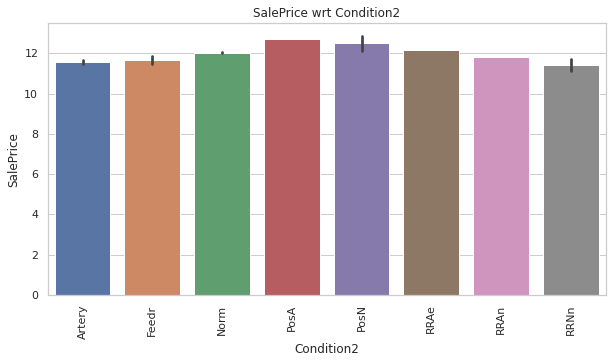

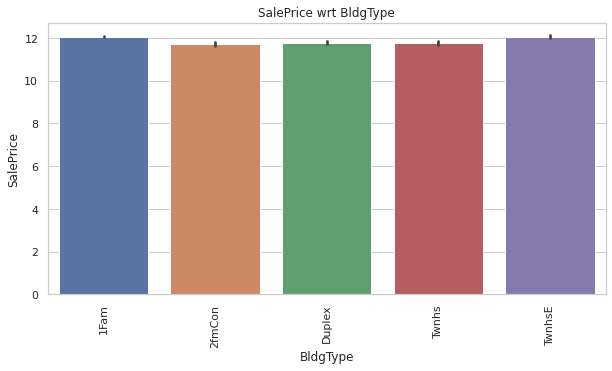

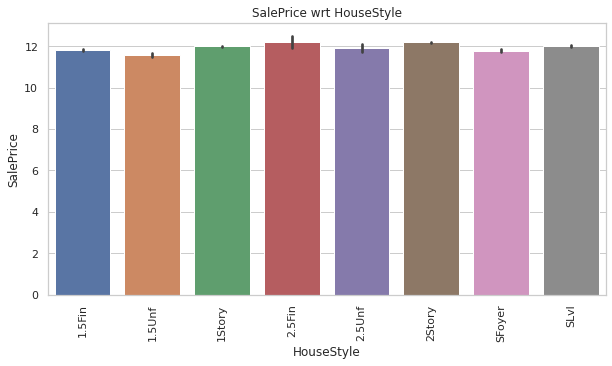

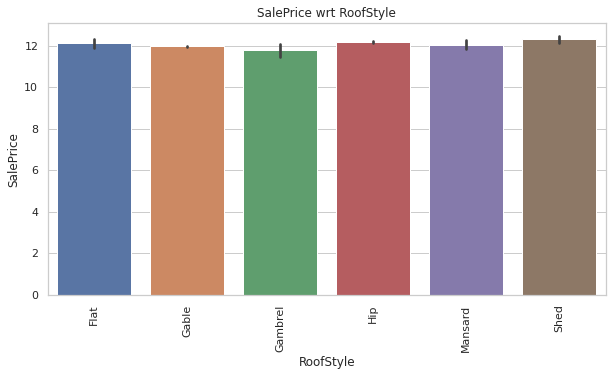

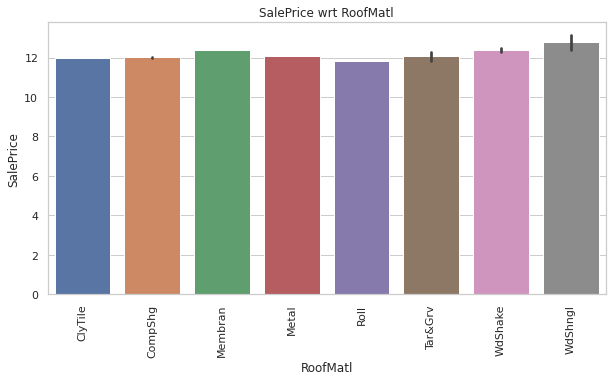

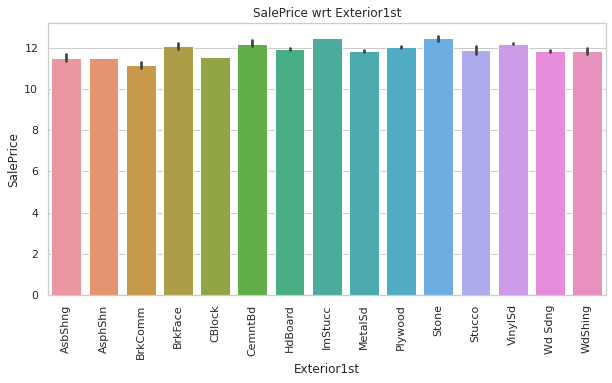

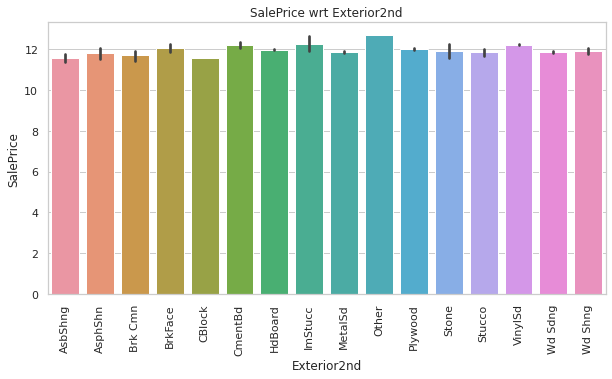

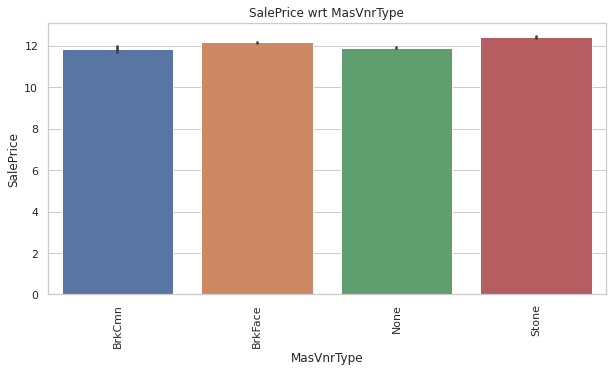

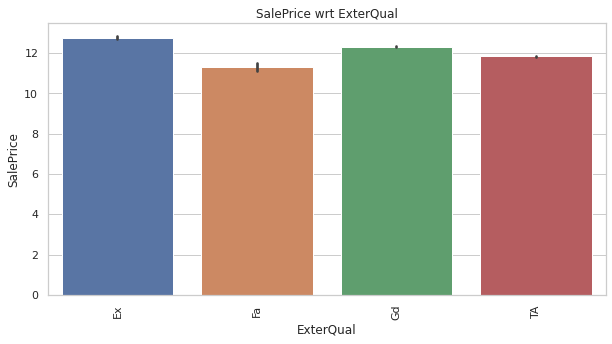

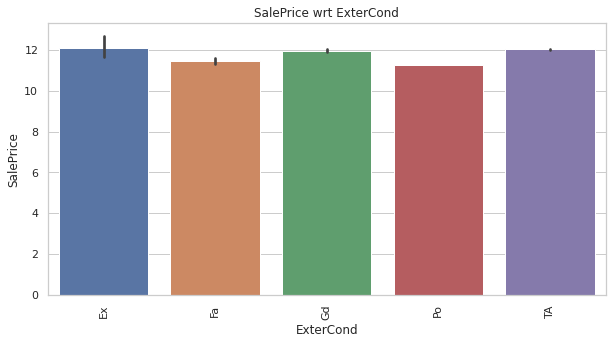

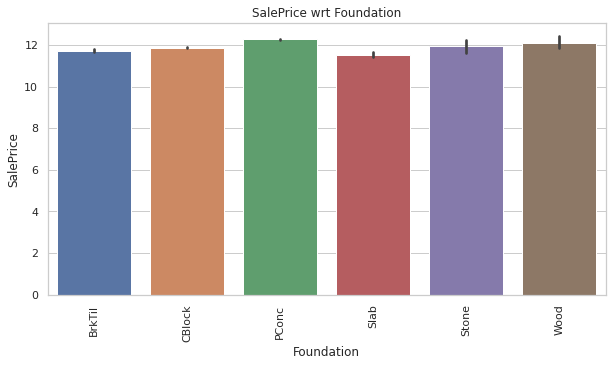

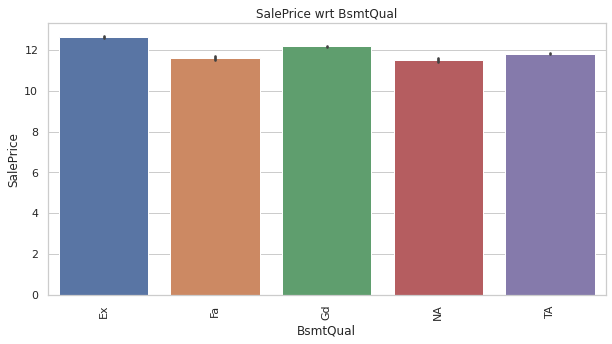

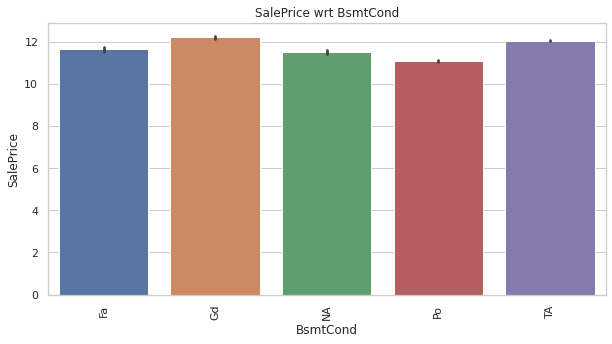

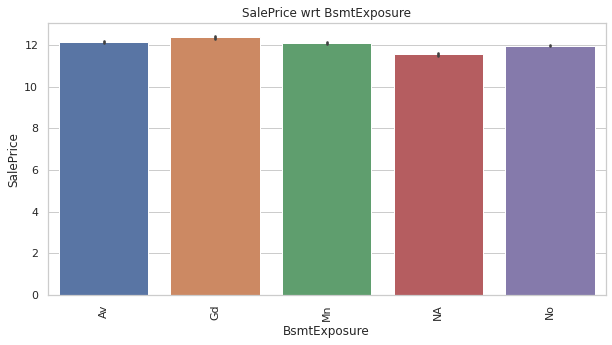

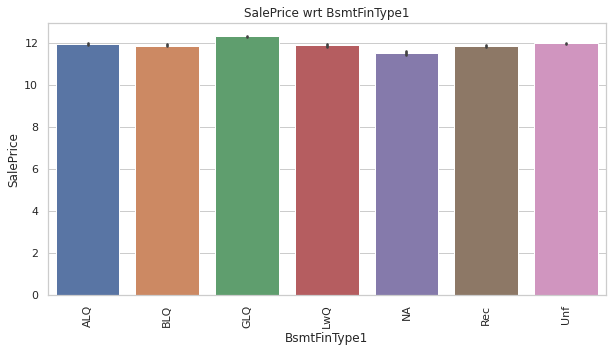

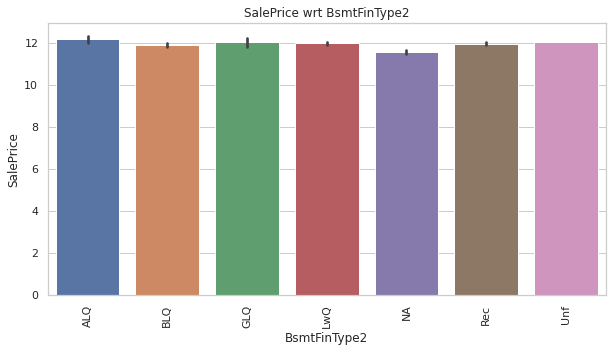

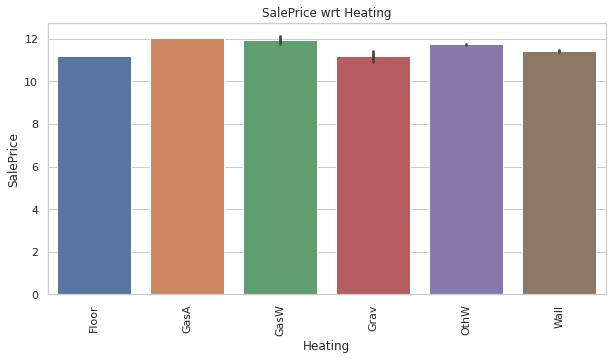

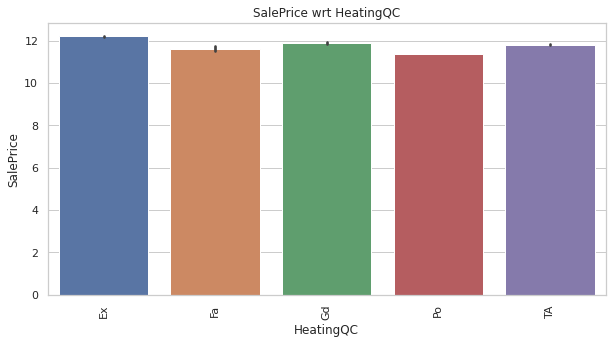

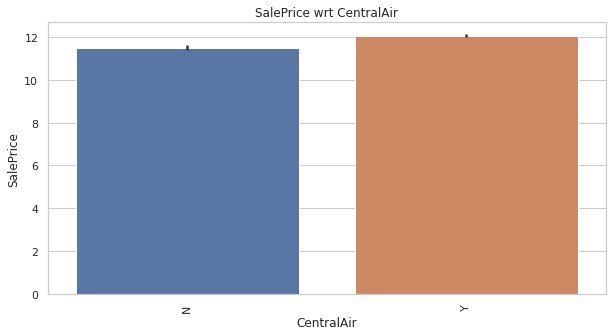

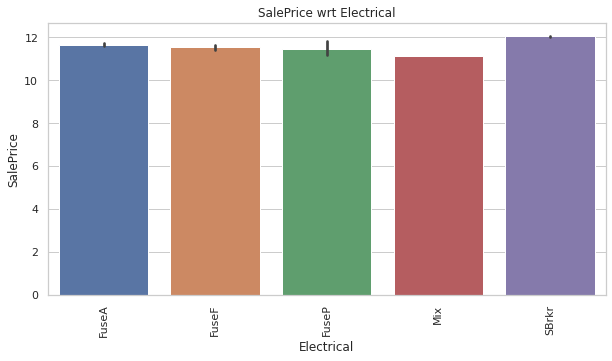

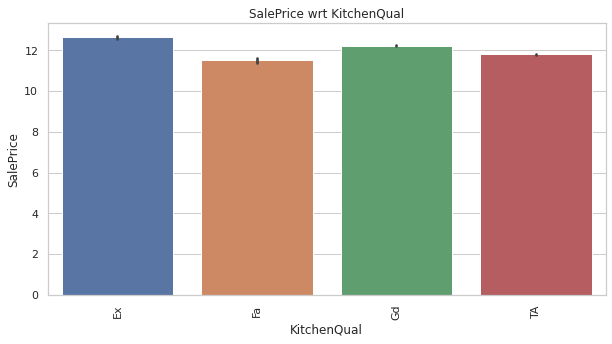

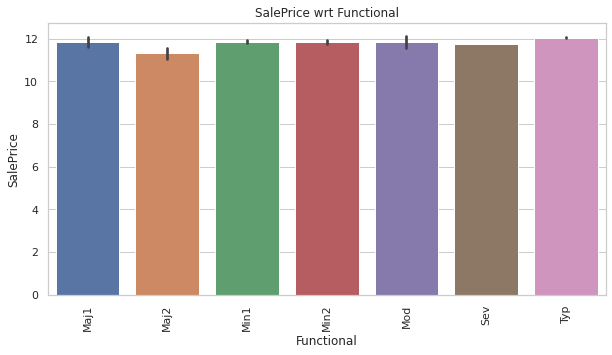

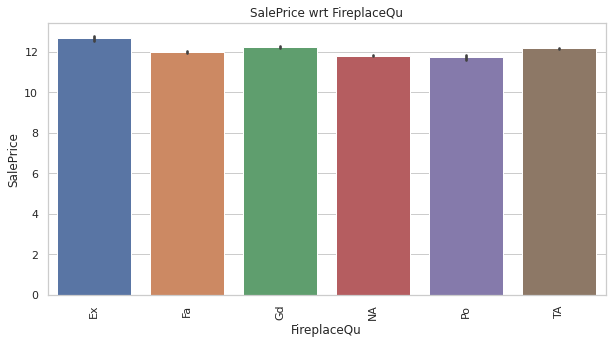

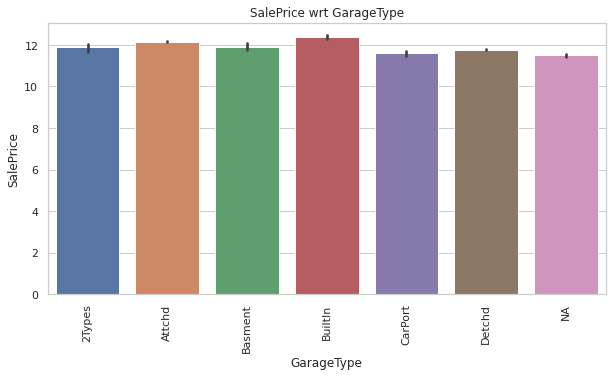

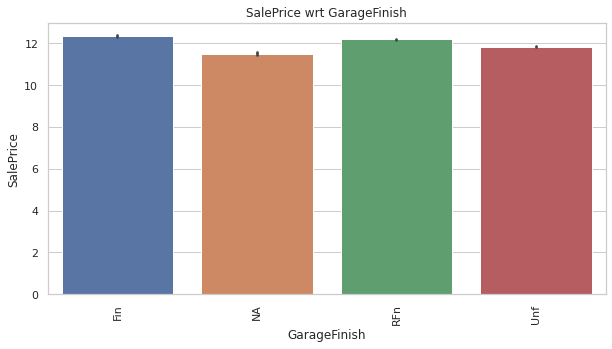

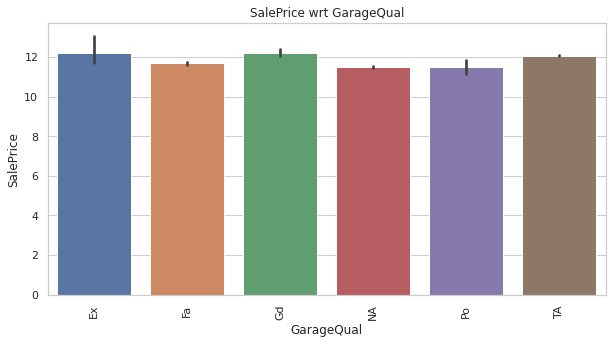

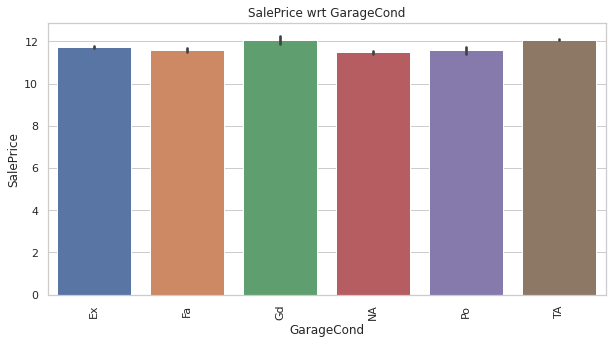

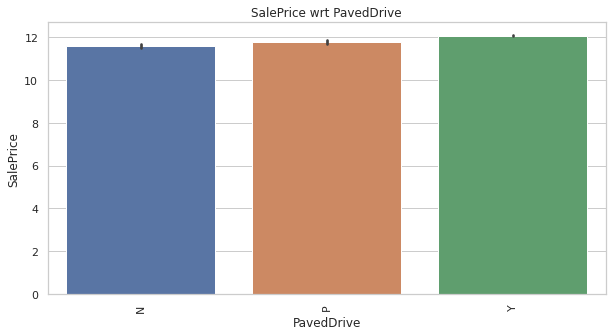

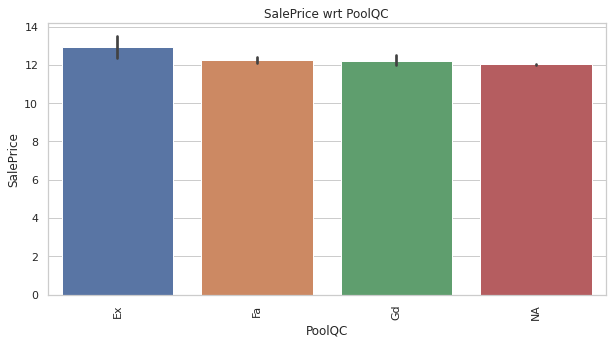

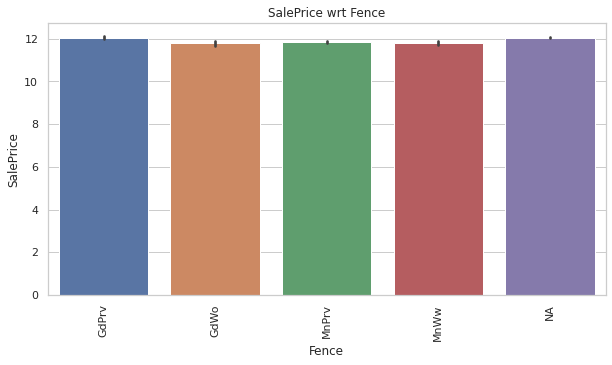

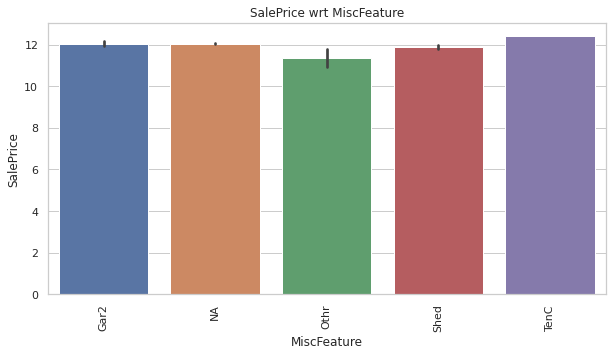

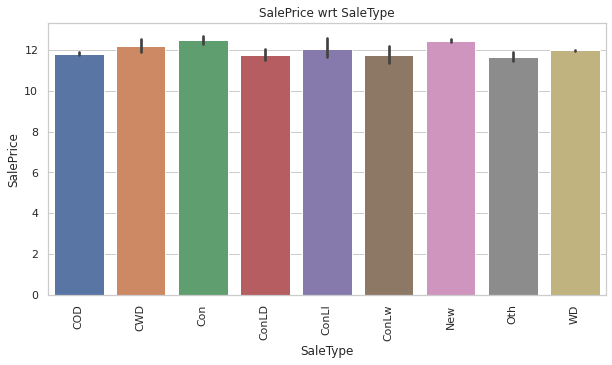

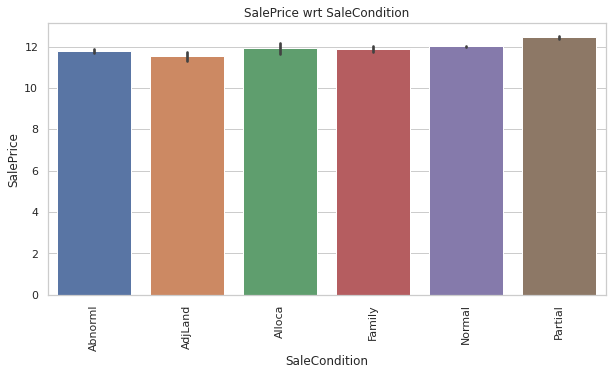

In [279]:
for i in my_list:
  try:
    bivariate_analysis(i,'SalePrice')
  except:
    pass

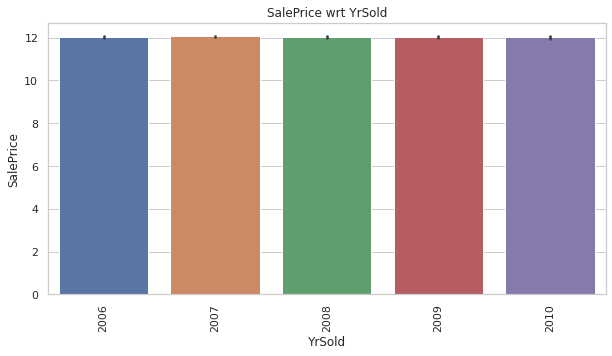

In [280]:
bivariate_analysis('YrSold','SalePrice')

In [281]:
my_list = df.select_dtypes(include=['int','float']).columns[1:-1]
my_list

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

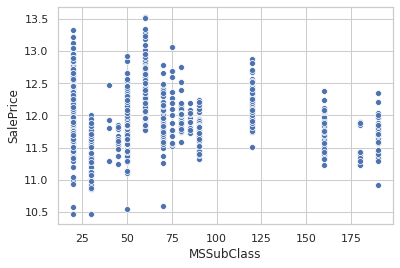

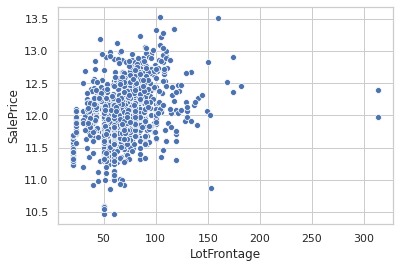

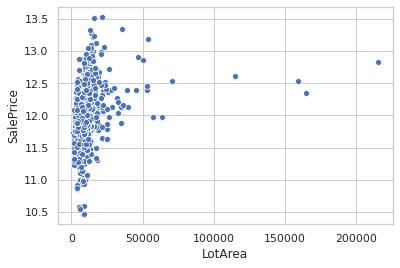

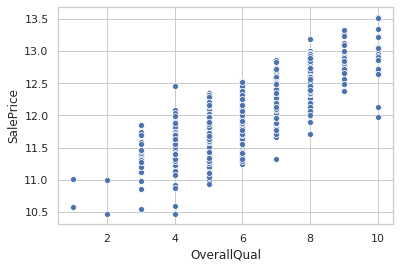

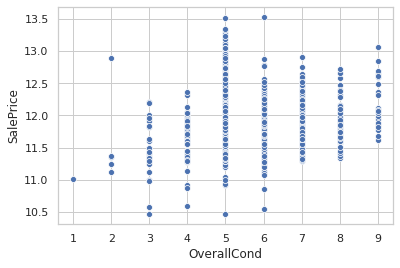

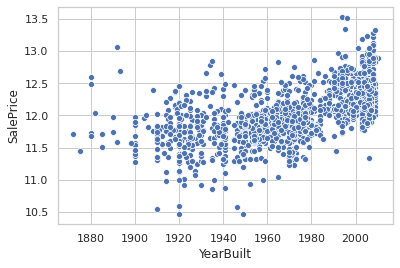

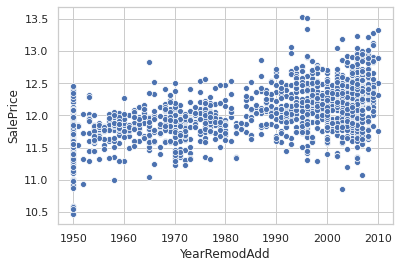

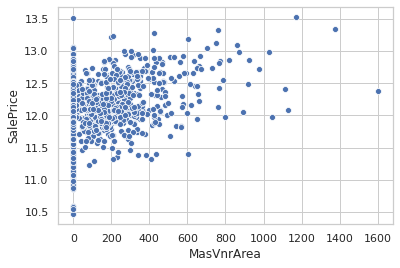

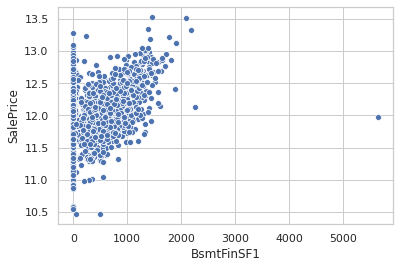

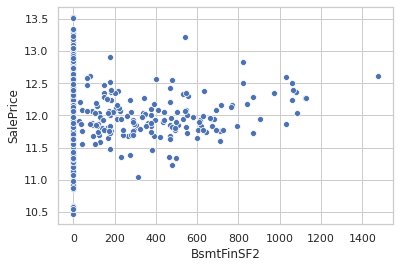

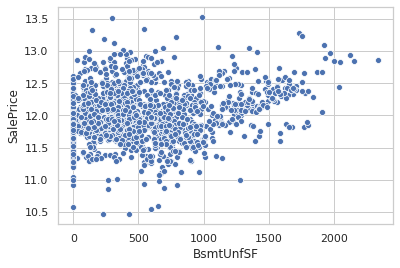

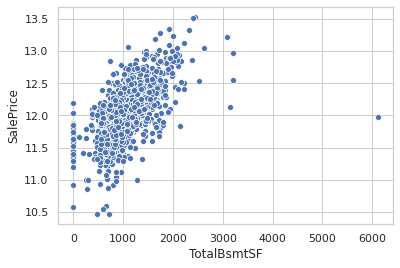

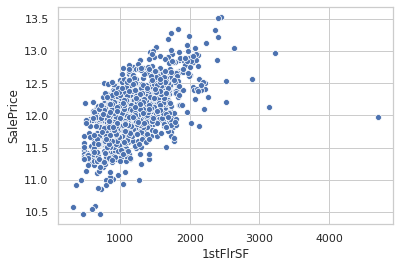

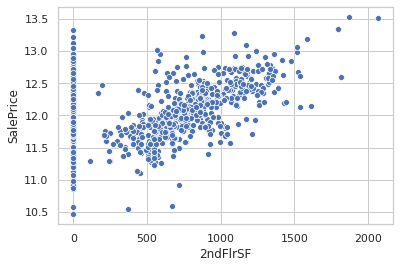

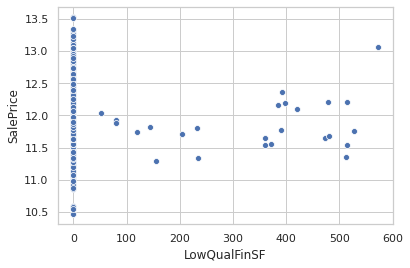

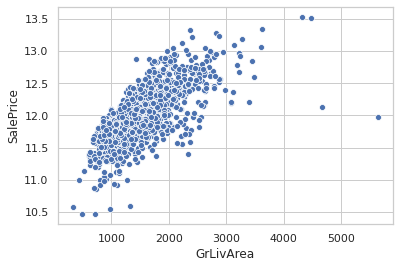

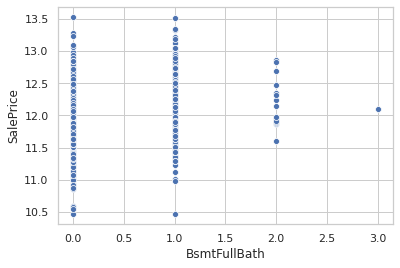

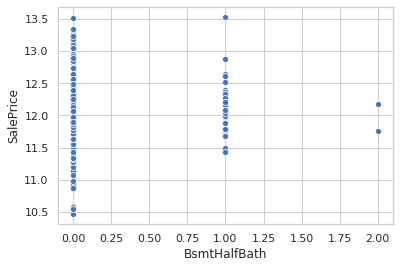

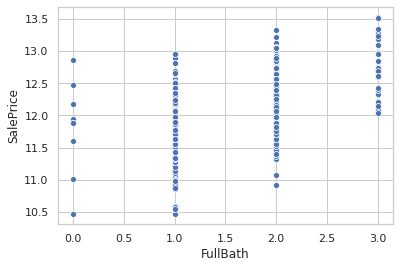

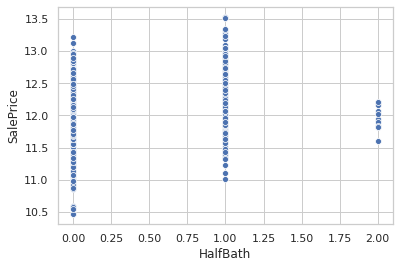

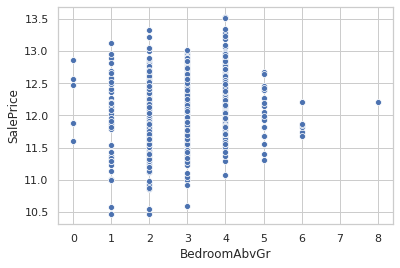

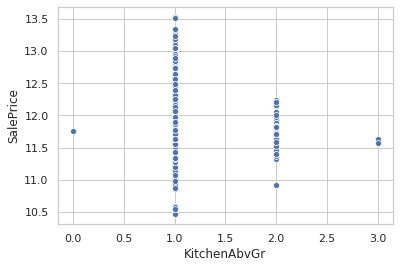

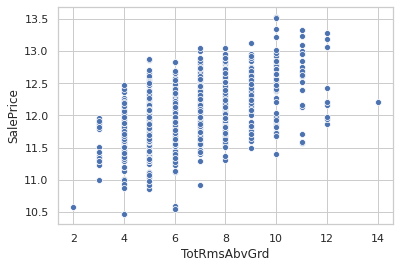

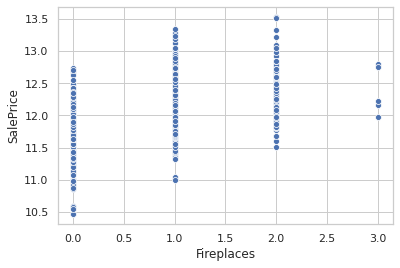

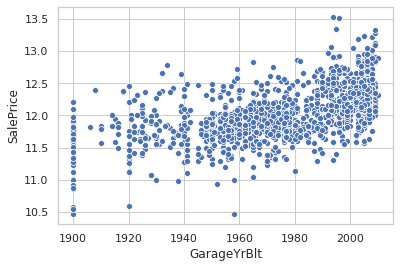

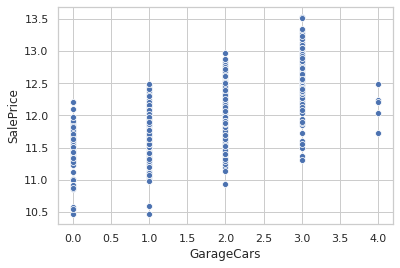

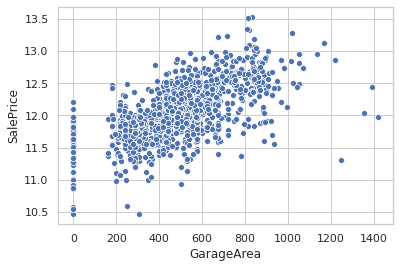

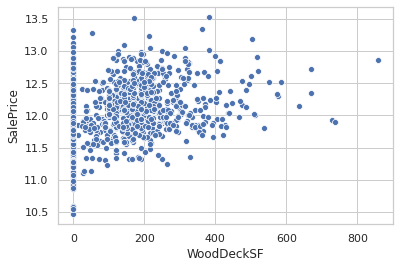

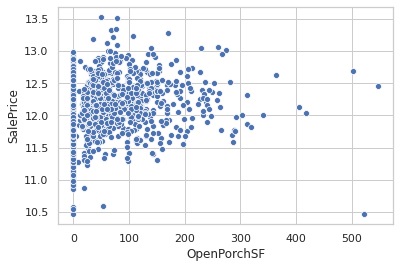

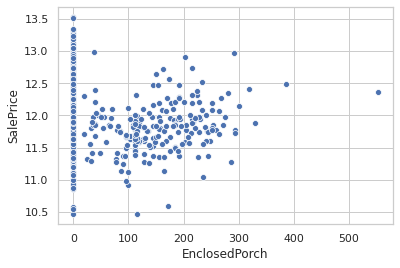

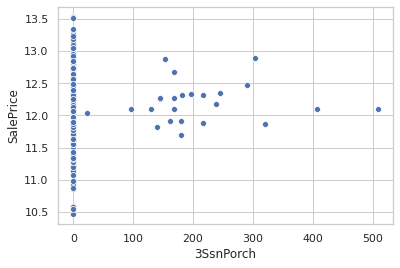

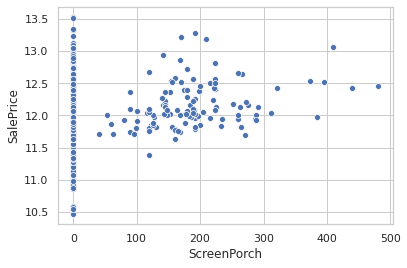

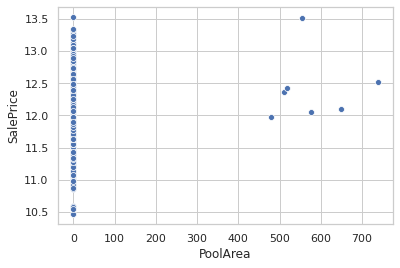

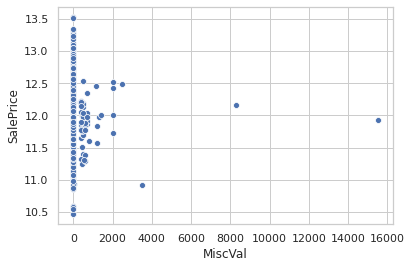

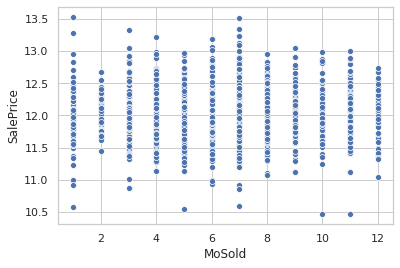

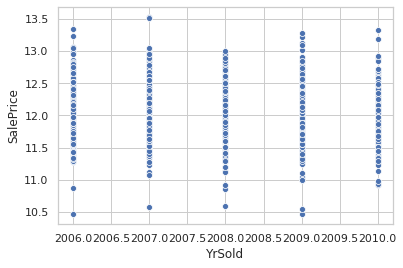

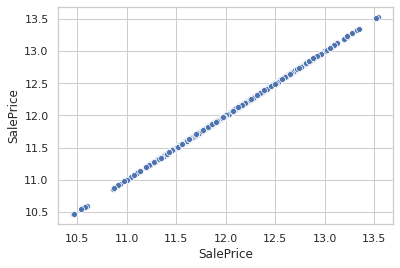

In [282]:
for i in my_list:
  sns.scatterplot(df[i],df.SalePrice)
  plt.show()

### Finding values that are categorical but represented as int

In [283]:
temp_list = df.select_dtypes(include=['int','float']).columns
conv_to_obj = []
for i in temp_list:
  if df[i].nunique()<20:
    print(i)
    conv_to_obj.append(i)

MSSubClass
OverallQual
OverallCond
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
PoolArea
MoSold
YrSold


In [284]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [285]:
conv_to_obj.remove('PoolArea')
conv_to_obj

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [286]:
for i in conv_to_obj:
  df[i] = df[i].astype(str)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [288]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelling
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,12.317167,6
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,11.849398,36
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,12.429216,8


## Tranforming Categorical Variables

In [289]:
obj_columns = df.select_dtypes(include=['object']).columns

In [290]:
obj_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [291]:
for col in obj_columns:
    le = LabelEncoder() 
    le.fit(list(df[col].values)) 
    df[col] = le.transform(list(df[col].values))

In [292]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelling
0,1,9,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,...,4,856,854,0,1710,1,0,2,1,3,1,2,10,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4,12.247694,5
1,2,4,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,4,1262,0,0,1262,0,1,2,0,3,1,3,8,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4,12.109011,31
2,3,9,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,4,920,866,0,1786,1,0,2,1,3,1,2,8,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4,12.317167,6
3,4,10,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,...,4,961,756,0,1717,1,0,1,0,3,1,2,9,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0,11.849398,36
4,5,9,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,4,1145,1053,0,2198,1,0,2,1,4,1,2,11,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4,12.429216,8


Dropping Id column as it doesnt provide any usefulness to model

In [293]:
df.drop('Id',axis=1,inplace=True)

## Data Splitting and Scaling using StandardScaler

In [294]:
y = df.loc[:, 'SalePrice']
X = df.loc[:, df.columns != 'SalePrice']

In [295]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodelling
0,9,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,10,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4,5
1,4,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,8,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4,31
2,9,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,8,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4,6
3,10,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,9,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0,36
4,9,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,11,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4,8


In [296]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [297]:
# scaler = MinMaxScaler() # giving 70 and 60 score
# scaler = RobustScaler() # giving close to standardscaler but little less
scaler = StandardScaler()

scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [298]:
new_X = pd.DataFrame(scaler.transform(X),columns=X.columns)
# new_X = X

In [299]:
new_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodelling
0,0.786430,-0.045532,-0.231877,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.708022,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.514104,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.678263,-0.510942,0.575425,0.344051,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.165410,-0.211454,-0.409369,0.974970,0.255978,-0.951226,-0.075117,-0.768736,0.962549,0.103495,0.311725,0.351000,0.315602,0.295349,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.837966,0.138777,0.313867,0.208502,-0.869941
1,-0.625160,-0.045532,0.437043,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,0.009096,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.570750,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.235906,-1.399536,1.171992,0.344051,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.165410,-0.211454,0.795629,0.053341,0.255978,0.600495,1.638498,-0.768736,0.061702,0.103495,0.311725,-0.060731,0.315602,0.295349,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.170633,-0.614439,0.313867,0.208502,0.390141
2,0.786430,-0.045532,-0.098093,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.708022,-0.517200,0.984752,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.325915,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.597850,-0.510942,0.092907,0.344051,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.165410,-0.211454,-0.409369,0.053341,0.255978,0.600495,1.638498,-0.768736,0.895820,0.103495,0.311725,0.631726,0.315602,0.295349,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,1.515431,0.138777,0.313867,0.208502,-0.821476
3,1.068748,-0.045532,-0.454850,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.708022,-0.517200,-1.863632,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.570750,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.678263,-1.399536,-0.499274,0.344051,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.165410,-0.211454,-0.409369,0.514155,0.255978,0.600495,-0.931925,1.301075,0.795726,0.942959,1.650307,0.790804,0.315602,0.295349,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.837966,-1.367655,0.313867,-3.426284,0.632464
4,0.786430,-0.045532,0.615421,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.

In [300]:
X_train, X_test, y_train, y_test=train_test_split(new_X,y, test_size=0.2, random_state=42)

## Linear Regression

In [326]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(f'Mean Squared Error on train data {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error on train data {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Model R2 Score on train data {lm.score(X_train,y_train)}')

print("*"*50)

y_test_pred = lm.predict(X_test)
print(f'Mean Squared Error on test data {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error on test data {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Model R2 Score on test data {lm.score(X_test,y_test)}')

Mean Squared Error on train data 0.017413248908988033
Root Mean Squared Error on train data 0.13195926988653747
Model R2 Score on train data 0.8857731064891373
**************************************************
Mean Squared Error on test data 0.026674453652387343
Root Mean Squared Error on test data 0.16332315712227505
Model R2 Score on test data 0.8570604428723467


## RFE Selection

In [302]:
# keep the range of features and finding best optimum feature number
nof_list=np.arange(10,21)            
high_score=0
select_col = []
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    y_pred = model.predict(X_test_rfe)
    print(f'For {nof_list[n]} features Model Score on test is {score}')
    print(f'For {nof_list[n]} features Mean Squared Error Score on test is {mean_squared_error(y_test,y_pred)}')
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        select_col = []
        for i in rfe.get_support(True):
          select_col.append(X_train.columns.values[i])
print("Optimum number of features: %d" %nof)
print("Model Score with %d features: %f" % (nof, high_score))

For 10 features Model Score on test is 0.8414802484601046
For 10 features Mean Squared Error Score on test is 0.029581928546642027
For 11 features Model Score on test is 0.8455873042869593
For 11 features Mean Squared Error Score on test is 0.02881549640915216
For 12 features Model Score on test is 0.8481705578752203
For 12 features Mean Squared Error Score on test is 0.028333426368520286
For 13 features Model Score on test is 0.8488196818035598
For 13 features Mean Squared Error Score on test is 0.028212291068473956
For 14 features Model Score on test is 0.8465421587014081
For 14 features Mean Squared Error Score on test is 0.028637307667457357
For 15 features Model Score on test is 0.8485036040333207
For 15 features Mean Squared Error Score on test is 0.02827127545321822
For 16 features Model Score on test is 0.8498912815126471
For 16 features Mean Squared Error Score on test is 0.02801231607660773
For 17 features Model Score on test is 0.8487715598915966
For 17 features Mean Squared

In [303]:
select_col

['BldgType',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 'CentralAir',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageCars',
 'PoolArea',
 'PoolQC',
 'Remodelling']

## Linear Regression on new features list

In [304]:
new_X_train = X_train.loc[:,select_col]
new_X_test = X_test.loc[:,select_col]
new_X_train.columns

Index(['BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'CentralAir', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageCars', 'PoolArea', 'PoolQC', 'Remodelling'],
      dtype='object')

In [325]:
lm = LinearRegression()
rfe = RFE(model,19)

X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

lm.fit(X_train_rfe, y_train)
score = lm.score(X_test_rfe,y_test)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(f'Mean Squared Error on train data {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error on train data {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Model R2 Score on train data {lm.score(X_train_rfe,y_train)}')

print("*"*50)

y_test_pred = lm.predict(X_test_rfe)
print(f'Mean Squared Error on test data {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error on test data {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Model R2 Score on test data {lm.score(X_test_rfe,y_test)}')


Mean Squared Error on train data 0.020719853694263365
Root Mean Squared Error on train data 0.14394392552054208
Model R2 Score on train data 0.8640825423293844
**************************************************
Mean Squared Error on test data 0.027555683068866025
Root Mean Squared Error on test data 0.16599904538540583
Model R2 Score on test data 0.8523382264715602


In [306]:
lm.coef_

array([-0.02963515,  0.06700909,  0.05193835,  0.06586864, -0.10473876,
       -0.02168267, -0.02861853,  0.03597023,  0.02518695,  0.13574354,
        0.03679691, -0.0274954 ,  0.0199767 ,  0.03615008, -0.0216818 ,
        0.05987941, -0.03994342, -0.02808214, -0.12069212])

## Lasso

In [323]:
lm = Lasso(alpha=0.1) # keeping random alpha value for now
lm.fit(new_X_train, y_train)

# predict
y_train_pred = lm.predict(new_X_train)
print(f'Mean Squared Error on train data {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error on train data {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Model R2 Score on train data {lm.score(new_X_train,y_train)}')

print("*"*50)

y_test_pred = lm.predict(new_X_test)
print(f'Mean Squared Error on test data {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error on test data {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Model R2 Score on test data {lm.score(new_X_test,y_test)}')

Mean Squared Error on train data 0.05040454380717384
Root Mean Squared Error on train data 0.22450956284126036
Model R2 Score on train data 0.6693578270190674
**************************************************
Mean Squared Error on test data 0.06581337698729395
Root Mean Squared Error on test data 0.25654117990547626
Model R2 Score on test data 0.6473279234794322


In [308]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.026),
 ('MSSubClass', -0.0),
 ('MSZoning', 0.051),
 ('LotFrontage', 0.0),
 ('LotArea', 0.03),
 ('Street', 0.0),
 ('Alley', -0.004),
 ('LotShape', -0.0),
 ('LandContour', 0.029),
 ('Utilities', 0.0),
 ('LotConfig', 0.099),
 ('LandSlope', 0.0),
 ('Neighborhood', -0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', -0.0),
 ('HouseStyle', 0.06),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.016)]

## Getting Best Parameter for Lasso and Ridge

In [309]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

params = {'alpha':[1e-03,0.001,0.0001,0.01,0.1,0.5,0.8,1,10,30,50,80,100,200,300,400,500]}


model = Ridge() # to get for Ridge model
# model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(new_X_train, y_train) 

get_best_score(model_cv)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1522372081772376
{'alpha': 50}
Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.5s finished


0.1522372081772376

In [310]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002835,0.000179,0.001250,0.000024,0.001,{'alpha': 0.001},-0.021297,-0.022527,-0.039629,-0.017871,-0.015568,-0.023378,0.008491,11,-0.020793,-0.020612,-0.017157,-0.021677,-0.022126,-0.020473,0.001749
1,0.002855,0.000107,0.001275,0.000016,0.001,{'alpha': 0.001},-0.021297,-0.022527,-0.039629,-0.017871,-0.015568,-0.023378,0.008491,11,-0.020793,-0.020612,-0.017157,-0.021677,-0.022126,-0.020473,0.001749
2,0.002783,0.000059,0.001280,0.000048,0.0001,{'alpha': 0.0001},-0.021297,-0.022527,-0.039629,-0.017871,-0.015568,-0.023378,0.008491,13,-0.020793,-0.020612,-0.017157,-0.021677,-0.022126,-0.020473,0.001749
3,0.002756,0.000034,0.001249,0.000032,0.01,{'alpha': 0.01},-0.021297,-0.022525,-0.039629,-0.017872,-0.015566,-0.023378,0.008491,10,-0.020793,-0.020612,-0.017157,-0.021677,-0.022126,-0.020473,0.001749
4,0.002801,0.000054,0.001282,0.000021,0.1,{'alpha': 0.1},-0.021295,-0.022506,-0.039632,-0.017878,-0.015551,-0.023372,0.008495,9,-0.020793,-0.020613,-0.017157,-0.021678,-0.022126,-0.020473,0.001749
5,0.002850,0.000082,0.001266,0.000019,0.5,{'alpha': 0.5},-0.021292,-0.022443,-0.039640,-0.017899,-0.015500,-0.023355,0.008506,8,-0.020796,-0.020617,-0.017157,-0.021678,-0.022131,-0.020476,0.001750
6,0.003527,0.001433,0.001285,0.000003,0.8,{'alpha': 0.8},-0.021293,-0.022411,-0.039642,-0.017912,-0.015474,-0.023346,0.008511,7,-0.020799,-0.020623,-0.017158,-0.021679,-0.022136,-0.020479,0.001752
7,0.002800,0.000069,0.001269,0.000034,1,{'alpha': 1},-0.021294,-0.022393,-0.039643,-0.017919,-0.015460,-0.023342,0.008513,6,-0.020801,-0.020626,-0.017158,-0.021680,-0.022139,-0.020481,0.001752
8,0.003076,0.000440,0.001261,0.000023,10,{'alpha': 10},-0.021385,-0.022180,-0.039484,-0.018003,-0.015328,-0.023276,0.008467,5,-0.020845,-0.020699,-0.017167,-0.021698,-0.022208,-0.020523,0.001768
9,0.002841,0.000112,0.001320,0.000056,30,{'alpha': 30},-0.021583,-0.022009,-0.039092,-0.018057,-0.015285,-0.023205,0.008315,3,-0.020900,-0.020771,-0.017210,-0.021747,-0.022276,-0.020581,0.001774


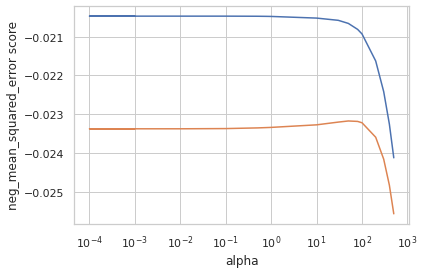

In [311]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_squared_error score')
plt.xscale('log')
plt.show()

## Ridge with Best Parameters

In [320]:
lm = Ridge(alpha=50)
lm.fit(new_X_train, y_train)

# predict
y_train_pred = lm.predict(new_X_train)
print(f'Mean Squared Error on train data {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error on train data {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Model R2 Score on train data {lm.score(new_X_train,y_train)}')

print("*"*50)

y_test_pred = lm.predict(new_X_test)
print(f'Mean Squared Error on test data {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error on test data {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Model R2 Score on test data {lm.score(new_X_test,y_test)}')

Mean Squared Error on train data 0.02085932385391227
Root Mean Squared Error on train data 0.14442757303891895
Model R2 Score on train data 0.8631676502746377
**************************************************
Mean Squared Error on test data 0.02797456422851657
Root Mean Squared Error on test data 0.16725598413365236
Model R2 Score on test data 0.8500935811554898


Text(0.5, 1.0, 'Feature importance using Ridge Model')

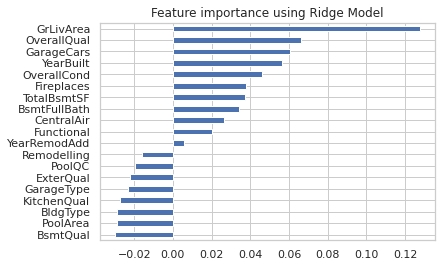

In [313]:
coef = pd.Series(lm.coef_, index = new_X_train.columns)
imp_coef = coef.sort_values()

imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## Lasso with Best Parameters

In [322]:
lm = Lasso(alpha=0.001)
lm.fit(new_X_train, y_train)

# predict
y_train_pred = lm.predict(new_X_train)
print(f'Mean Squared Error on train data {mean_squared_error(y_train, y_train_pred)}')
print(f'Root Mean Squared Error on train data {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Model R2 Score on train data {lm.score(new_X_train,y_train)}')

print("*"*50)

y_test_pred = lm.predict(new_X_test)
print(f'Mean Squared Error on test data {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error on test data {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Model R2 Score on test data {lm.score(new_X_test,y_test)}')

Mean Squared Error on train data 0.02078811136932377
Root Mean Squared Error on train data 0.1441808287163164
Model R2 Score on train data 0.8636347877362481
**************************************************
Mean Squared Error on test data 0.02763200025192773
Root Mean Squared Error on test data 0.1662287587992154
Model R2 Score on test data 0.8519292679792803


lasso model parameters

In [315]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.025),
 ('MSSubClass', -0.029),
 ('MSZoning', 0.067),
 ('LotFrontage', 0.05),
 ('LotArea', 0.064),
 ('Street', 0.0),
 ('Alley', -0.021),
 ('LotShape', -0.028),
 ('LandContour', 0.036),
 ('Utilities', 0.025),
 ('LotConfig', 0.135),
 ('LandSlope', 0.036),
 ('Neighborhood', -0.027),
 ('Condition1', 0.02),
 ('Condition2', 0.036),
 ('BldgType', -0.021),
 ('HouseStyle', 0.06),
 ('OverallQual', -0.03),
 ('OverallCond', -0.02),
 ('YearBuilt', -0.017)]

Text(0.5, 1.0, 'Feature importance using Lasso Model')

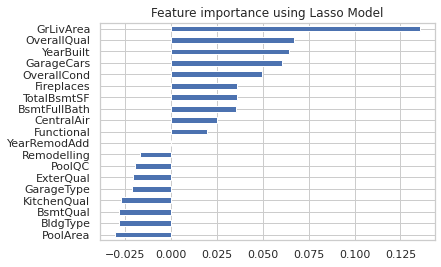

In [316]:
coef = pd.Series(lm.coef_, index = new_X_train.columns)
imp_coef = coef.sort_values()

imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Conclusions

* Top 5 Features for predicting house price are 
  1. GrLivArea
  2. OverallQual
  3. YearBuilt
  4. GarageCars
  5. PoolArea

* Model used **Linear Regression, Ridge and Lasso**

* Feature Selection using **RFE**

* Scaling on X feature is done using **StandardScaler** and on price using **log**

* Using all features Model Score **.88 for train and .85 for test**

* Using 19 features Model Score **.86 for train and .85 for test**

* Final **Mean Squared Error 0.020** for both train and test (approx)

* Root Mean Squared Error 0.14 for test and 0.16 for test

